Import some packages (most, but probably not all needed for the code below)

In [1]:
# Import some pacakges
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline
  


In [2]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from scipy import stats

import statsmodels.api as sm
from scipy import stats

In [3]:
import random

I create three types of collections of data sets where each data set is 2-dimensional and contains N points.
<ol>
<li>  The ith data set (x[i], y[i]) contains random points. </li>
<li>  The ith data set (x[i], y_exp[i]) contains points from an exponential curve.</li>
<li>  The ith data set (x[i], y_NOISY[i]) contains points from a line y = 2x with 20% noise.</li>
</ol>
For each of the above 3 types, I create K different data sets (so 0 &le; i &le; k-1).
<p>
Note it would take less memory if I created these data sets as I needed them.

In [4]:
# So that the same random numbers are generated everytime this 
# block of code is run
np.random.seed(1) 

N = 15  # number of data points in data set.
K = 4000  # number of datasets. 
x = np.random.random((K,N))  # x[i] contains all the x coordinates of the ith data set.

# I now create the y coordinates so that each of my 
# data sets (x[i], y[i]), 0 <= i < K where i = ith data set
# contain N randomly chosen points
np.random.seed(2)   # I choose a different random seed to generate the y coordinates
y = np.random.random((K, N))    # y[i] contains all the y coordinate of the ith data set. 

# I now create the y coordinates so that each of my data sets contain 
#                 K randomly chosen points from an exponential curve.
y_exp = np.exp(x)   # create exponential function

# I now create the y coordinate so that each point comes from the line
# y = 3*x, but I add 30% noise with a NORMAL distribution.
np.random.seed(4)   # I choose a different random seed to generate 
                    # the noise with a NORMAL distribution).
Noise = np.random.random((K, N)) - 0.5
y_NOISY =  3*x + 1.3*Noise
y_NOISYnormal =  3*x + np.random.normal(loc=0.0, scale=0.1, size=(K, N))


Here, I changed the number of data points from 10 to 15, changed the number of datasets from 5000 to 4000. Also, I changed $2x$ into $3x$ and added 30% noise with a normal distribution. For the random normal distribution, I changed the scale from 0.2 to 0.1, which means the standard deviation changed.

In [5]:
# plt.pyplot.xticks(fontsize=14)

Text(0, 0.5, 'Frequency')

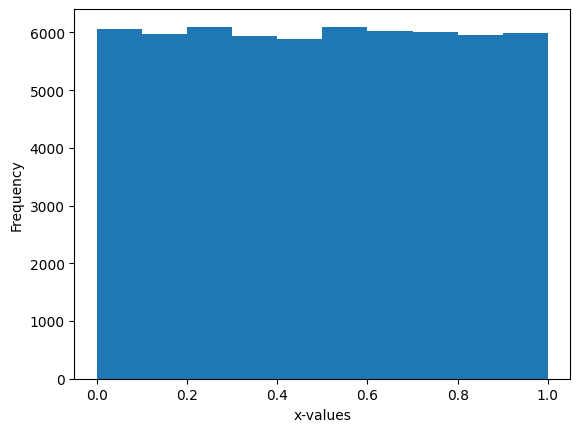

In [6]:
plt.hist(x.reshape(-1), 10)
plt.xlabel('x-values')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

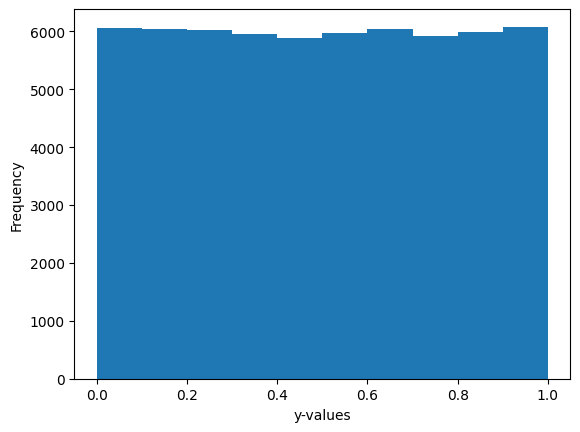

In [7]:
plt.hist(y.reshape(-1), 10)
plt.xlabel('y-values')
plt.ylabel('Frequency')

(array([1539., 4302., 7101., 8617., 8468., 8510., 8576., 7135., 4298.,
        1454.]),
 array([-0.63846649, -0.21056321,  0.21734007,  0.64524335,  1.07314663,
         1.50104991,  1.92895319,  2.35685647,  2.78475975,  3.21266303,
         3.64056631]),
 <BarContainer object of 10 artists>)

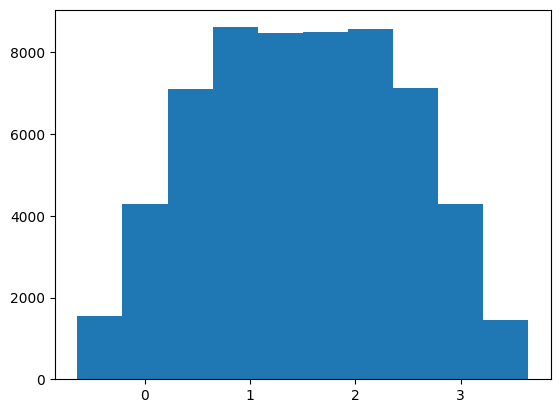

In [8]:
plt.hist(y_NOISY.reshape(-1), 10)

(array([1782., 7019., 7268., 7260., 7077., 7348., 7227., 7179., 6736.,
        1104.]),
 array([-0.28730693,  0.07462464,  0.43655622,  0.79848779,  1.16041936,
         1.52235093,  1.8842825 ,  2.24621408,  2.60814565,  2.97007722,
         3.33200879]),
 <BarContainer object of 10 artists>)

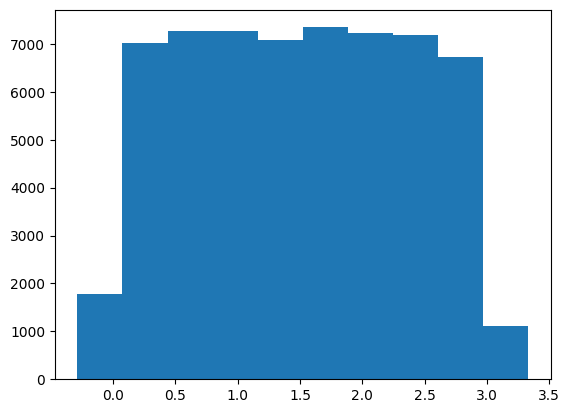

In [9]:
plt.hist(y_NOISYnormal.reshape(-1), 10)

Text(0, 0.5, 'Frequency')

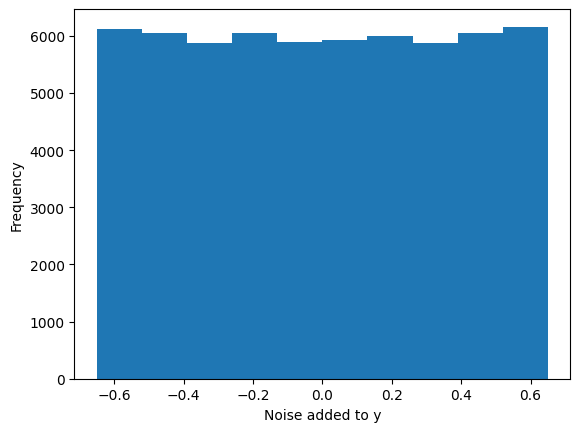

In [10]:
plt.hist(1.3*Noise.reshape(-1), 10)
plt.xlabel('Noise added to y')
plt.ylabel('Frequency')

(array([4.0000e+00, 7.8000e+01, 1.0660e+03, 6.2730e+03, 1.6401e+04,
        2.0949e+04, 1.1722e+04, 3.0720e+03, 4.1300e+02, 2.2000e+01]),
 array([-0.48464137, -0.39294713, -0.30125288, -0.20955863, -0.11786439,
        -0.02617014,  0.0655241 ,  0.15721835,  0.2489126 ,  0.34060684,
         0.43230109]),
 <BarContainer object of 10 artists>)

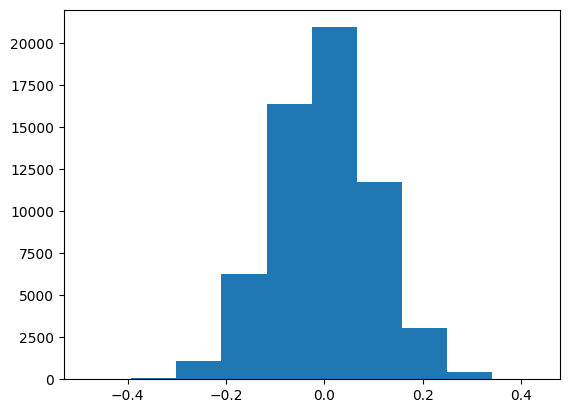

In [11]:
plt.hist(np.random.normal(loc=0.0, scale=0.1, size=(K, N)).reshape(-1), 10)

In [12]:
x-np.random.random((K, N))

array([[-3.32855749e-01, -2.49877195e-01, -7.42659248e-01, ...,
        -1.54670812e-01,  1.66361458e-01, -1.71797784e-01],
       [-4.46329050e-02,  6.80470665e-02, -2.81180553e-02, ...,
        -3.43064319e-01, -3.73622808e-01,  5.32338500e-01],
       [-6.03983682e-01, -4.22706133e-01,  6.78307462e-01, ...,
         2.15834903e-01,  1.67002451e-01, -4.30952578e-01],
       ...,
       [-2.88705957e-01, -1.67935936e-03,  2.12247263e-01, ...,
        -5.16843240e-01,  4.09188276e-01,  1.81140930e-01],
       [-1.01695742e-01, -6.67889551e-01, -9.42966478e-01, ...,
         3.73680262e-01,  1.63270524e-04,  2.02782317e-01],
       [ 2.05127676e-01, -2.59434752e-01,  2.90551580e-01, ...,
         4.85312596e-01, -2.83513266e-01,  5.49523542e-02]])

What does random data look like?  Below are plots of the first 16 data sets.  But compare the ticks on the x-axis to the ticks on the y-axis.  It is best to set the aspect ratio = 1 so that one dimension isn't compressed with respect to the other one.

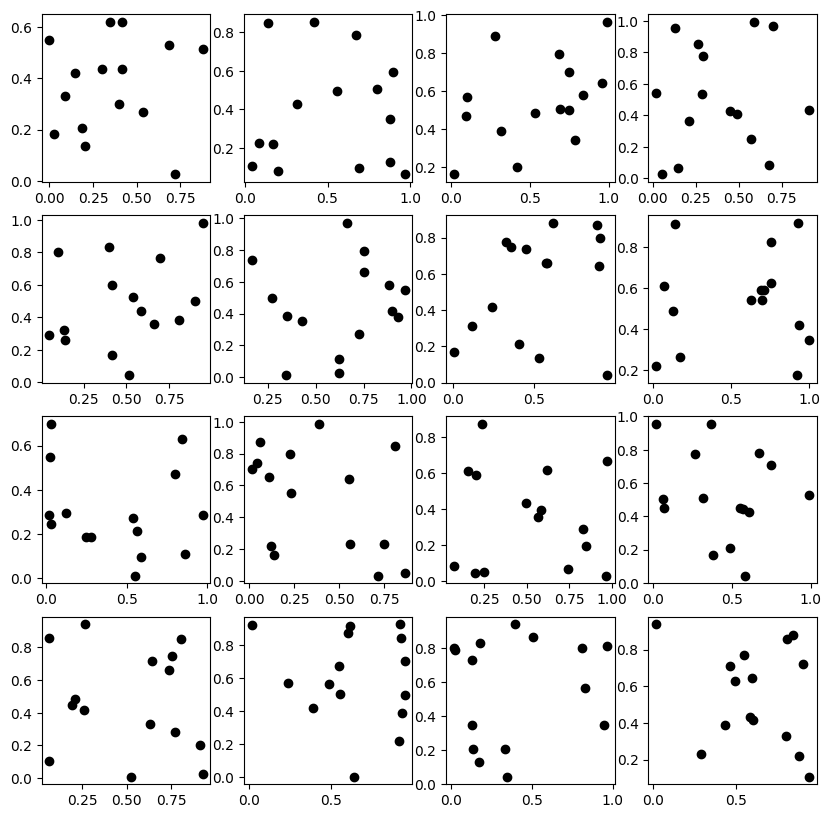

In [13]:
fig = plt.figure(figsize=(10,10))  # make figures larger is 4x4 grid
for i in range(16):
    #plt.scatter(x[i], y[i],  color='black')
    ax1 = plt.subplot(4, 4, i+1)         
    plt.axis('on')
    #ax1.set_xticklabels([])
    #ax1.set_yticklabels([])
    #ax1.set_aspect('equal')
    plt.scatter(x[i], y[i],  color='black')
    i = i+1
    #plt.subplots_adjust(wspace=None, hspace=None)
plt.show()

What does random data look like? Note aspect ratio = 1 but the ticks on the x vs y axis have different meaning (so you can't use the ticks to determine the aspect ratio)

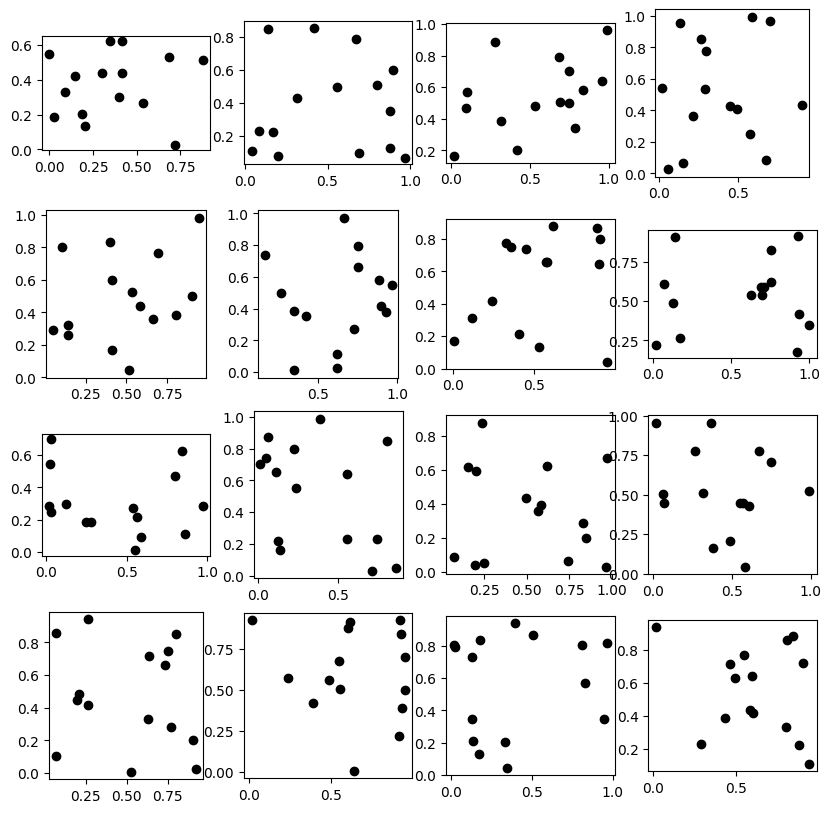

In [14]:
fig = plt.figure(figsize=(10,10))  # make figures larger is 4x4 grid
for i in range(16):
    #plt.scatter(x[i], y[i],  color='black')
    ax1 = plt.subplot(4, 4, i+1)         
    plt.axis('on')
    #ax1.set_xticklabels([])
    #ax1.set_yticklabels([])
    ax1.set_aspect('equal')   #aspect ratio = 1
    plt.scatter(x[i], y[i],  color='black')
    i = i+1
    #plt.subplots_adjust(wspace=None, hspace=None)
plt.show()

(-0.030240363233923345,
 1.03738972948461,
 0.1221859744229668,
 1.0046637041686022)

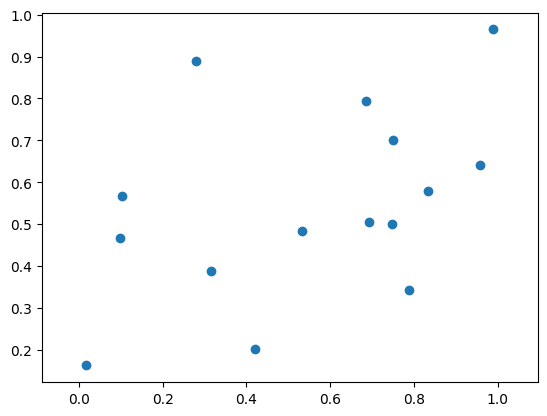

In [15]:
data = np.column_stack((x[2], y[2]))
plt.scatter(data[:,0], data[:,1])
plt.axis('equal')
#plt.gca().set_aspect('equal', adjustable='box')

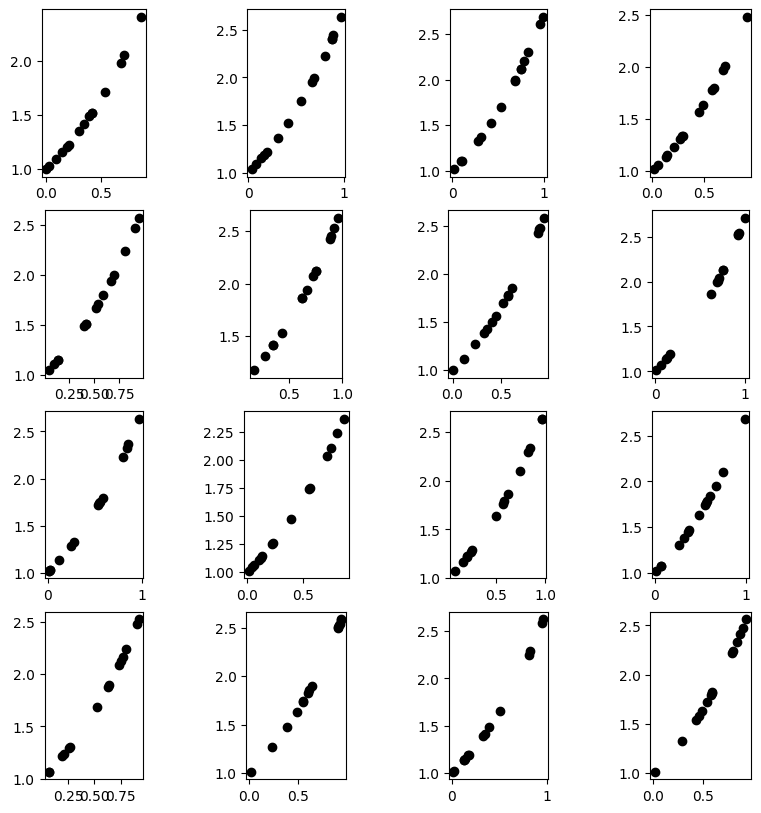

In [16]:
fig = plt.figure(figsize=(10,10))  # make figures larger is 4x4 grid
for i in range(16):
    #plt.scatter(x[i], y[i],  color='black')
    ax1 = plt.subplot(4, 4, i+1)         
    plt.axis('on')
    ax1.set_aspect('equal')   #aspect ratio = 1
    plt.scatter(x[i], y_exp[i],  color='black')
    i = i+1
    #plt.subplots_adjust(wspace=None, hspace=None)
plt.show()

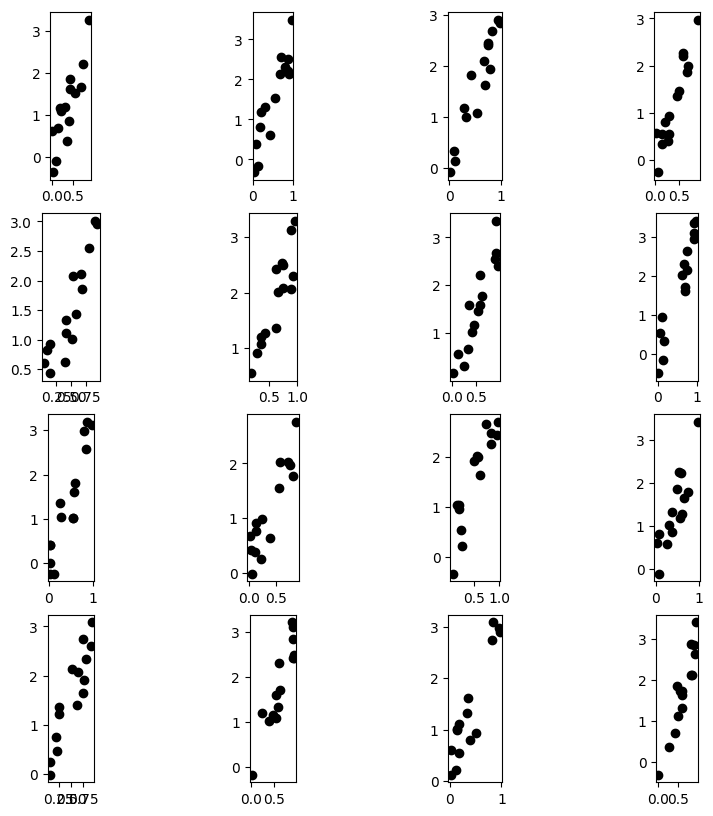

In [17]:
fig = plt.figure(figsize=(10,10))  # make figures larger is 4x4 grid
for i in range(16):
    #plt.scatter(x[i], y[i],  color='black')
    ax1 = plt.subplot(4, 4, i+1)         
    plt.axis('on')
    ax1.set_aspect('equal')   #aspect ratio = 1
    plt.scatter(x[i], y_NOISY[i],  color='black')
    i = i+1
    #plt.subplots_adjust(wspace=None, hspace=None)
plt.show()

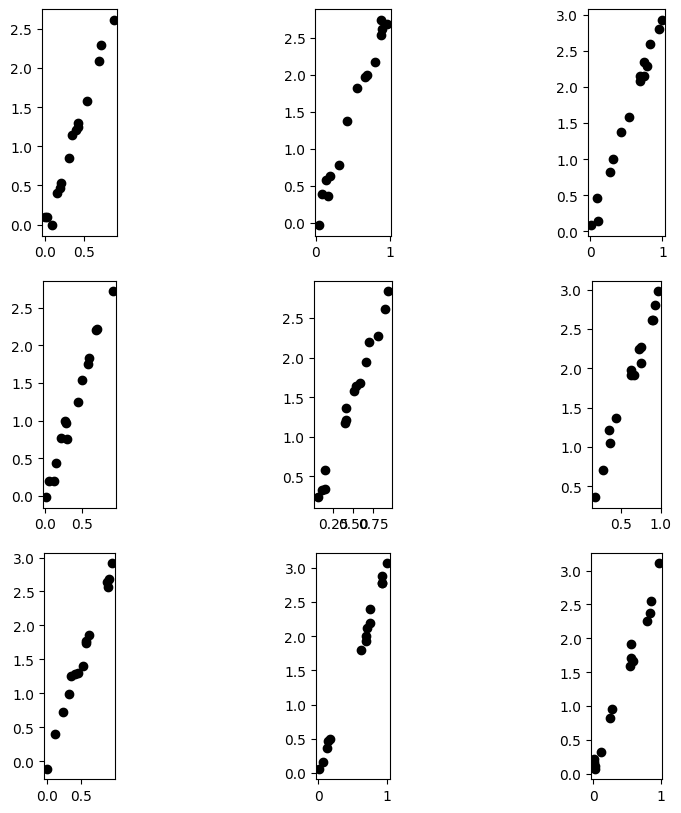

In [18]:
fig = plt.figure(figsize=(10,10))  # make figures larger is 4x4 grid
for i in range(9):
    #plt.scatter(x[i], y[i],  color='black')
    ax1 = plt.subplot(3, 3, i+1)         
    plt.axis('on')
    ax1.set_aspect('equal')   #aspect ratio = 1
    plt.scatter(x[i], y_NOISYnormal[i],  color='black')
    i = i+1
    #plt.subplots_adjust(wspace=None, hspace=None)
plt.show()

In [19]:
f_array = np.array([])

Compute the F statistic for linear regression for each of the K data sets containing random points.

In [20]:
#my_X_reg_2 = sm.add_constant(my_X_reg)
for i in range(K):
    my_est = sm.OLS(x[i], y[i])
    my_est_2 = my_est.fit()
    f_array = np.append(f_array, my_est_2.fvalue)
    #print(my_est_2.summary())

In [21]:
np.size(f_array)

4000

Plot a histogram for the F statistic including a line indicating the p-value = 0.05.

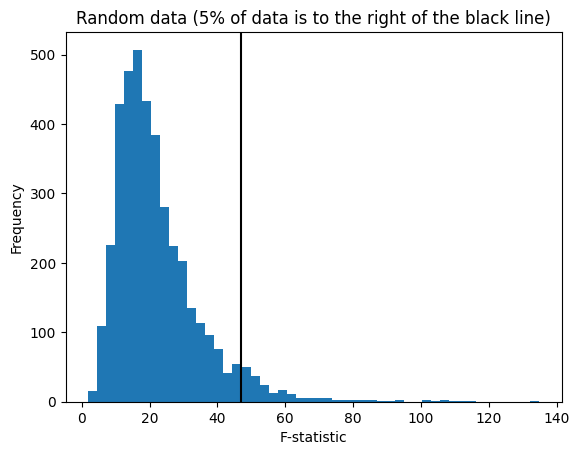

In [22]:
plt.hist(f_array, 50)
plt.axvline(x=np.percentile(f_array, 95), color='black')
plt.xlabel('F-statistic')
plt.ylabel('Frequency')
plt.title('Random data (5% of data is to the right of the black line)');

In [23]:
np.percentile(f_array, 95)  # 95% of F stat lie below this value.

46.976930408070054

The magenta lines indicate the F statistic for 10 of the exponential curves.

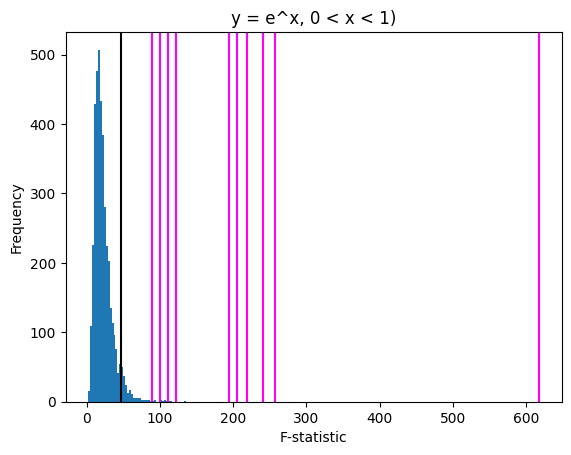

In [24]:
plt.hist(f_array, 50)
for i in range(10):
    my_est = sm.OLS(x[i], y_exp[i])
    my_est_2 = my_est.fit()
    #print(my_est_2.fvalue)
    plt.axvline(x=my_est_2.fvalue, color='magenta')
plt.axvline(x=np.percentile(f_array, 95), color='black')
plt.xlabel('F-statistic')
plt.ylabel('Frequency')
plt.title('y = e^x, 0 < x < 1)');

In [25]:
# As usual, we will try to illustrate everything using the df_mydata data set
import urllib.request 
# urllib.request.urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", "iris.csv")

df_mydata = pd.read_csv('NewSeoulBikeData.csv')
df_mydata = df_mydata[df_mydata['Hour']>=11]
df_mydata = df_mydata[df_mydata['Hour']<=15]
# View the type
type(df_mydata)

# # Specify the column names that you want to use as features in this model.
headers =  ["Rented Bike Count","Hour","Temperature","Humidity","Seasons"]
df_mydata.columns = headers

# If your data set is large, this the "head()" function let's you view the first few entries to see what's inside.
df_mydata.head()

,Rented Bike Count,Hour,Temperature,Humidity,Seasons
11,360,11,-0.5,21,Winter
12,449,12,1.7,23,Winter
13,451,13,2.4,25,Winter
14,447,14,3.0,26,Winter
15,463,15,2.1,36,Winter


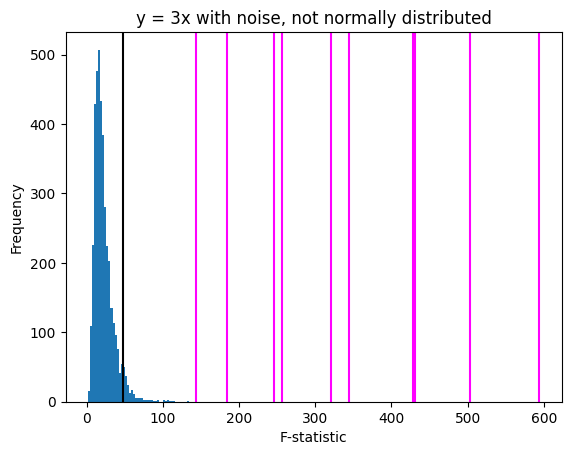

In [28]:
plt.hist(f_array, 50)
for i in range(10):
    my_est = sm.OLS(x[i], y_NOISY[i])
    my_est_2 = my_est.fit()
    #print(my_est_2.fvalue)
    plt.axvline(x=my_est_2.fvalue, color='magenta')
plt.axvline(x=np.percentile(f_array, 95), color='black')
plt.xlabel('F-statistic')
plt.ylabel('Frequency')
plt.title('y = 3x with noise, not normally distributed');

In [27]:
# calculate the regression line for one of the exponential curves.

my_X_reg = x[1].reshape(-1,1)   # reshape transposes matrix
my_Y_reg = y_exp[1].reshape(-1,1)  

reg = LinearRegression()
reg.fit(my_X_reg, my_Y_reg)

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

The linear model is: Y = 0.89024 + 1.692X


We already know the p-value from the previous lab, it is the probability of we assume the null hypothesis is true, then get a test statistic at least as extreme as the one that was actually observed. Then, we are going to use F-statistic to analysis the relationship between x and y. The F-statistic measures whether the explained variance is significantly greater than the unexplained variance. If the F-statistic is large and the associated p-value is small (usually we chooose p less than 0.05), then we reject the null hypothesis and conclude the regression model as a whole is statistically significant.

For the very first part, we can see the scatter plots (random data) are unordered, which means before the black line, we get true negatives, there's no relationship between x and y and the F-statistic indicates there's not relationship between x and y. After the black line, we get false positive, the F-statistic indicates there is a relationship between x an y. 

For the second big part, we can see the scatter plot is exponential or linear, which means there is a relationship between x and y, and the F-statistic indicates before black line, x and y has no relationship, after black line they have relationship.

So, if in our data, we get a large F-statistic and a small p-value, which means the regression model is likely a good fit for the data, and the independent variables jointly explain a significant amount of the variance in the dependent variable.

For the last two F-statistic graphs, we have F=50, and 5% data are larger than F, 95% data lower than F. This result for my dataset is as what I expected. At the 5% significance level, there is insufficient evidence that there is a difference among the mean value for this dataset.